In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib
from scipy.optimize import curve_fit

In [2]:
import matplotlib.pyplot as plt
plt.style.use('../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
data = pd.read_csv('../data/xe_pressure_vs_density.txt', sep=",")
data.columns = ['Density', 'Pressure']

In [4]:
def bar2psi(x): 
    return x*14.503773773
def psi2bar(x): 
    return x/14.503773773

In [5]:
def func(x,a,b,c,d,e,f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x**1 + f

In [6]:
popt, pcov = curve_fit(func, data['Density'], data['Pressure'])

In [7]:
xfit = np.linspace(0,2,100000)
fit = func(xfit,*popt)

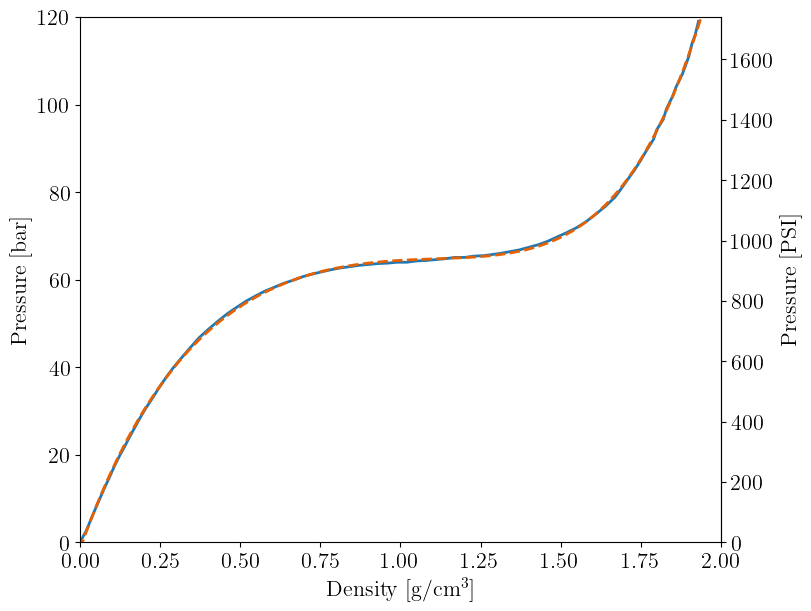

In [8]:
fig, ax = plt.subplots(constrained_layout=True)
plt.plot(data['Density'], data['Pressure'])
plt.xlim(0,2)
plt.ylim(0,120)
plt.xlabel('Density [g/cm$^3$]')
plt.ylabel('Pressure [bar]')
secax = ax.secondary_yaxis('right', functions=(bar2psi, psi2bar))
secax.set_ylabel('Pressure [PSI]')

plt.plot(xfit, func(xfit,*popt), ls='--')

plt.show()

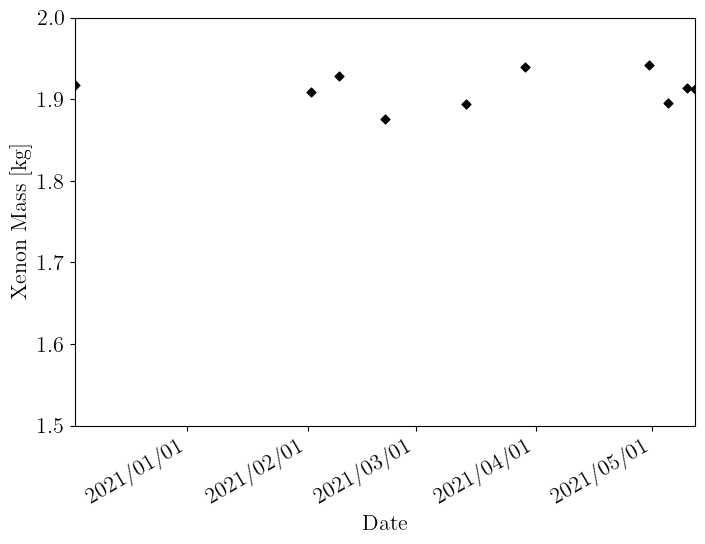

In [9]:
left = [331.3,331.4,574.4,777.8,0,396.1,611.9,781.6,778,779.5]
right = [659.7,660.1,454.6,25.8,783.6,615.6,393.4,0,0,0]
date = ['2021/05/12','2021/05/10','2021/05/05','2021/04/30','2021/03/29','2021/03/14','2021/02/21','2021/02/09','2021/02/02','2020/12/03']

date = [dt.strptime(x, '%Y/%m/%d') for x in date]

fig,ax = plt.subplots()

formatter = matplotlib.dates.DateFormatter('%Y/%m/%d')

plt.xlabel('Date')
plt.ylabel('Xenon Mass [kg]')

plt.ylim(1.5,2)

for i,(x,y) in enumerate(zip(left,right)):
    val1 = psi2bar(x)
    val2 = psi2bar(y)

    diff1 = np.abs(fit - val1)
    diff2 = np.abs(fit - val2)

    cut1 = np.where(diff1 == np.min(diff1))[0][0]
    cut2 = np.where(diff2 == np.min(diff2))[0][0]

    kg1 = np.round(xfit[cut1]*3800.0/1000.0, 3)
    kg2 = np.round(xfit[cut2]*3800.0/1000.0, 3)
    total = np.round(kg1+kg2,3)
    plt.scatter(date[i], total, color='k', marker='D', s=20)

ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.show()